**Please run required sections of notebook as necessary.**

In [1]:
import pandas as pd 
import os
import IPython

import json
with open("to_from_data.json", "r") as read_file:
    rankings = json.load(read_file)
data = pd.DataFrame(rankings)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import qeds
qeds.themes.mpl_style();

import cartopy.crs as ccrs #cartopy documentation: https://scitools.org.uk/cartopy/docs/latest/
import cartopy.feature as cfeature

import geopandas as gpd
from shapely.geometry import Point

In [3]:
inst_data = pd.read_json("to_from_data.json") #set directory as necessary

In [4]:
inst_data #same as data ^

,aid,to_institution_id,to_name,to_oid,startdate,to_latitude,to_longitude,to_rank,recruiter_type,description,from_oid,from_institution_id,latitude,longitude,from_institution_name,category_id,name,rank
0,2121,535,Tsinghua University,623,2010-01-01,39.999567,116.331991,86.0,1,Academic organization (economics department),186,2,42.273857,-83.737582,University of Michigan,1,Development; Growth,14.0
1,3816,2205,Amherst College,3503,2010-01-01,42.370910,-72.517003,NaN,1,Academic organization (economics department),186,2,42.273857,-83.737582,University of Michigan,1,Development; Growth,14.0
2,4160,1489,International Food Policy Research Institute (...,2600,2006-01-01,38.901517,-77.028317,NaN,7,Private (non-profit) business or organization,186,2,42.273857,-83.737582,University of Michigan,1,Development; Growth,14.0
3,4160,270,Colby College,316,2003-01-01,44.563869,-69.662636,NaN,1,Academic organization (economics department),186,2,42.273857,-83.737582,University of Michigan,1,Development; Growth,14.0
4,7484,13,University of Maryland,20,2011-08-01,38.984795,-76.944012,24.0,1,Academic organization (economics department),186,2,42.273857,-83.737582,University of Michigan,1,Development; Growth,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,43362,303,Temple University,2006,2019-07-01,NaN,NaN,NaN,2,Academic organization (business school),3209,17,NaN,NaN,Duke University,34,Statistics,NaN
4884,43445,742,New York University,881,2019-09-01,40.729055,-73.996523,NaN,1,Academic organization (economics department),3284,915,NaN,NaN,University of Tokyo,34,Statistics,NaN
4885,44214,22,Columbia University,29,2014-07-01,40.807715,-73.959602,10.0,1,Academic organization (economics department),2471,255,NaN,NaN,University of Zurich (Universität Zürich),34,Statistics,NaN
4886,44214,22,Columbia University,1164,2015-07-01,40.808962,-73.961354,10.0,2,Academic organization (business school),2471,255,NaN,NaN,University of Zurich (Universität Zürich),34,Statistics,NaN


In [5]:
inst_data = inst_data.dropna(subset = ["to_latitude", "to_longitude", "latitude", "longitude"]) #drop observations with missing geocoordinates

inst_data.dtypes

aid                        int64
to_institution_id          int64
to_name                   object
to_oid                     int64
startdate                 object
to_latitude              float64
to_longitude             float64
to_rank                  float64
recruiter_type             int64
description               object
from_oid                   int64
from_institution_id        int64
latitude                 float64
longitude                float64
from_institution_name     object
category_id                int64
name                      object
rank                     float64
dtype: object

In [6]:
#from datetime import datetime as dt
# startdate is a pandas timestamp, doesn't need to be converted to datetime
inst_data['startdate'] = pd.to_datetime(inst_data['startdate'])
inst_data = inst_data[inst_data['startdate'].dt.year == 2019] #select rows with start date in year 2019
inst_data

/home/peters/anaconda3/envs/sage/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,aid,to_institution_id,to_name,to_oid,startdate,to_latitude,to_longitude,to_rank,recruiter_type,description,from_oid,from_institution_id,latitude,longitude,from_institution_name,category_id,name,rank
6,7484,18,Northwestern University,25,2019-01-01,42.057154,-87.671636,12.0,1,Academic organization (economics department),186,2,42.273857,-83.737582,University of Michigan,1,Development; Growth,14.0
33,35553,797,"NHH, Norwegian School of Economics",954,2019-07-01,60.422938,5.302409,NaN,1,Academic organization (economics department),186,2,42.273857,-83.737582,University of Michigan,1,Development; Growth,14.0
36,42385,225,International Monetary Fund (IMF),1170,2019-07-01,0.000000,0.000000,NaN,8,Other type of organization,186,2,42.273857,-83.737582,University of Michigan,1,Development; Growth,14.0
40,38422,66,"University of California, Santa Barbara",1361,2019-01-01,34.415009,-119.846163,NaN,1,Academic organization (economics department),186,2,42.273857,-83.737582,University of Michigan,2,Econometrics,14.0
41,42321,1,"University of California, San Diego",44,2019-07-01,32.882291,-117.240397,NaN,1,Academic organization (economics department),186,2,42.273857,-83.737582,University of Michigan,2,Econometrics,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4866,41061,1526,Universidad de Deusto (University of Deusto),2138,2019-09-01,43.271245,-2.938558,NaN,2,Academic organization (business school),4226,2587,40.429581,-3.711425,Universidad Pontificia Comillas,30,Marketing,NaN
4869,36924,2318,IÉSEG School of Management (Institut d'Économi...,3721,2019-07-01,48.892598,2.236112,NaN,2,Academic organization (business school),360,310,41.393363,2.107844,Universidad de Navarra,32,Organizational Behavior,NaN
4870,38248,180,Universitat Pompeu Fabra,453,2019-07-01,41.389712,2.189701,NaN,1,Academic organization (economics department),360,310,41.393363,2.107844,Universidad de Navarra,32,Organizational Behavior,NaN
4875,43706,90,University College London,235,2019-07-01,51.526067,-0.133295,16.0,1,Academic organization (economics department),943,120,52.202195,0.117062,University of Cambridge,33,Real Estate,NaN


In [7]:
inst_data.name.unique().shape #note 33 unique categories, names

(31,)

In [8]:
inst_data.description.unique() #note 10 unique recruiter_types, descriptions

array(['Academic organization (economics department)',
       'Other type of organization',
       'Private (for profit) business or organization',
       'Government agency or commission',
       'Academic organization (other than econ, business, or ag econ)',
       'Academic organization (business school)',
       'Academic organization (agricultural/resource economics department)',
       'Private (non-profit) business or organization'], dtype=object)

In [9]:
import nltk
nltk.download("punkt")

def desc_reviser(string):
    string = string.lower()
    tokens = [i for i in nltk.tokenize.word_tokenize(string)]
    return(tokens)

#desc_reviser(inst_data.description[6])

[nltk_data] Downloading package punkt to /home/peters/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
desc_tokens = [desc_reviser(i) for i in inst_data.description]
inst_data["desc_tokens"] = desc_tokens
inst_data

,aid,to_institution_id,to_name,to_oid,startdate,to_latitude,to_longitude,to_rank,recruiter_type,description,from_oid,from_institution_id,latitude,longitude,from_institution_name,category_id,name,rank,desc_tokens
6,7484,18,Northwestern University,25,2019-01-01,42.057154,-87.671636,12.0,1,Academic organization (economics department),186,2,42.273857,-83.737582,University of Michigan,1,Development; Growth,14.0,"[academic, organization, (, economics, departm..."
33,35553,797,"NHH, Norwegian School of Economics",954,2019-07-01,60.422938,5.302409,NaN,1,Academic organization (economics department),186,2,42.273857,-83.737582,University of Michigan,1,Development; Growth,14.0,"[academic, organization, (, economics, departm..."
36,42385,225,International Monetary Fund (IMF),1170,2019-07-01,0.000000,0.000000,NaN,8,Other type of organization,186,2,42.273857,-83.737582,University of Michigan,1,Development; Growth,14.0,"[other, type, of, organization]"
40,38422,66,"University of California, Santa Barbara",1361,2019-01-01,34.415009,-119.846163,NaN,1,Academic organization (economics department),186,2,42.273857,-83.737582,University of Michigan,2,Econometrics,14.0,"[academic, organization, (, economics, departm..."
41,42321,1,"University of California, San Diego",44,2019-07-01,32.882291,-117.240397,NaN,1,Academic organization (economics department),186,2,42.273857,-83.737582,University of Michigan,2,Econometrics,14.0,"[academic, organization, (, economics, departm..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4866,41061,1526,Universidad de Deusto (University of Deusto),2138,2019-09-01,43.271245,-2.938558,NaN,2,Academic organization (business school),4226,2587,40.429581,-3.711425,Universidad Pontificia Comillas,30,Marketing,NaN,"[academic, organization, (, business, school, )]"
4869,36924,2318,IÉSEG School of Management (Institut d'Économi...,3721,2019-07-01,48.892598,2.236112,NaN,2,Academic organization (business school),360,310,41.393363,2.107844,Universidad de Navarra,32,Organizational Behavior,NaN,"[academic, organization, (, business, school, )]"
4870,38248,180,Universitat Pompeu Fabra,453,2019-07-01,41.389712,2.189701,NaN,1,Academic organization (economics department),360,310,41.393363,2.107844,Universidad de Navarra,32,Organizational Behavior,NaN,"[academic, organization, (, economics, departm..."
4875,43706,90,University College London,235,2019-07-01,51.526067,-0.133295,16.0,1,Academic organization (economics department),943,120,52.202195,0.117062,University of Cambridge,33,Real Estate,NaN,"[academic, organization, (, economics, departm..."


In [11]:
inst_data["revised_description"] = 0

for i in inst_data.index:
    if "academic" in inst_data.desc_tokens[i]:
        inst_data.revised_description[i] = inst_data.description[i]
        
    elif "government" in inst_data.desc_tokens[i]:
        inst_data.revised_description[i] = inst_data.description[i]
        
    elif "private" or "other" in inst_data.desc_tokens[i]:
        inst_data.revised_description[i] = "Private business or organization; Other type of organization"
        
    else: inst_data["revised_description"][i] = np.nan

inst_data

/home/peters/anaconda3/envs/sage/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/peters/anaconda3/envs/sage/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/peters/anaconda3/envs/sage/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

,aid,to_institution_id,to_name,to_oid,startdate,to_latitude,to_longitude,to_rank,recruiter_type,description,from_oid,from_institution_id,latitude,longitude,from_institution_name,category_id,name,rank,desc_tokens,revised_description
6,7484,18,Northwestern University,25,2019-01-01,42.057154,-87.671636,12.0,1,Academic organization (economics department),186,2,42.273857,-83.737582,University of Michigan,1,Development; Growth,14.0,"[academic, organization, (, economics, departm...",Academic organization (economics department)
33,35553,797,"NHH, Norwegian School of Economics",954,2019-07-01,60.422938,5.302409,NaN,1,Academic organization (economics department),186,2,42.273857,-83.737582,University of Michigan,1,Development; Growth,14.0,"[academic, organization, (, economics, departm...",Academic organization (economics department)
36,42385,225,International Monetary Fund (IMF),1170,2019-07-01,0.000000,0.000000,NaN,8,Other type of organization,186,2,42.273857,-83.737582,University of Michigan,1,Development; Growth,14.0,"[other, type, of, organization]",Private business or organization; Other type o...
40,38422,66,"University of California, Santa Barbara",1361,2019-01-01,34.415009,-119.846163,NaN,1,Academic organization (economics department),186,2,42.273857,-83.737582,University of Michigan,2,Econometrics,14.0,"[academic, organization, (, economics, departm...",Academic organization (economics department)
41,42321,1,"University of California, San Diego",44,2019-07-01,32.882291,-117.240397,NaN,1,Academic organization (economics department),186,2,42.273857,-83.737582,University of Michigan,2,Econometrics,14.0,"[academic, organization, (, economics, departm...",Academic organization (economics department)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4866,41061,1526,Universidad de Deusto (University of Deusto),2138,2019-09-01,43.271245,-2.938558,NaN,2,Academic organization (business school),4226,2587,40.429581,-3.711425,Universidad Pontificia Comillas,30,Marketing,NaN,"[academic, organization, (, business, school, )]",Academic organization (business school)
4869,36924,2318,IÉSEG School of Management (Institut d'Économi...,3721,2019-07-01,48.892598,2.236112,NaN,2,Academic organization (business school),360,310,41.393363,2.107844,Universidad de Navarra,32,Organizational Behavior,NaN,"[academic, organization, (, business, school, )]",Academic organization (business school)
4870,38248,180,Universitat Pompeu Fabra,453,2019-07-01,41.389712,2.189701,NaN,1,Academic organization (economics department),360,310,41.393363,2.107844,Universidad de Navarra,32,Organizational Behavior,NaN,"[academic, organization, (, economics, departm...",Academic organization (economics department)
4875,43706,90,University College London,235,2019-07-01,51.526067,-0.133295,16.0,1,Academic organization (economics department),943,120,52.202195,0.117062,University of Cambridge,33,Real Estate,NaN,"[academic, organization, (, economics, departm...",Academic organization (economics department)


In [12]:
inst_data[inst_data["description"] == "Academic organization (other than econ, business, or ag econ)"] #check to ensure conditional in correct order - notice word "other"

,aid,to_institution_id,to_name,to_oid,startdate,to_latitude,to_longitude,to_rank,recruiter_type,description,from_oid,from_institution_id,latitude,longitude,from_institution_name,category_id,name,rank,desc_tokens,revised_description
290,41869,766,Korea Development Institute (KDI),1051,2019-07-01,36.481403,127.309839,NaN,4,"Academic organization (other than econ, busine...",37,29,42.350911,-71.105495,Boston University,1,Development; Growth,30.0,"[academic, organization, (, other, than, econ,...","Academic organization (other than econ, busine..."
470,33342,184,Behavior and Inequality Research Institute (briq),1204,2019-01-01,50.730250,7.109999,22.0,4,"Academic organization (other than econ, busine...",217,186,51.757409,-1.246866,University of Oxford,1,Development; Growth,8.0,"[academic, organization, (, other, than, econ,...","Academic organization (other than econ, busine..."
505,42082,186,University of Oxford,693,2019-07-01,51.752721,-1.262431,8.0,4,"Academic organization (other than econ, busine...",217,186,51.757409,-1.246866,University of Oxford,2,Econometrics,8.0,"[academic, organization, (, other, than, econ,...","Academic organization (other than econ, busine..."
851,40905,378,Nazarbayev University,619,2019-07-01,51.090530,71.398165,NaN,4,"Academic organization (other than econ, busine...",1326,1078,50.874810,4.700209,Katholieke Universiteit Leuven (KU Leuven),1,Development; Growth,NaN,"[academic, organization, (, other, than, econ,...","Academic organization (other than econ, busine..."
866,41937,78,Stanford University,1167,2019-07-01,37.427370,-122.164862,3.0,4,"Academic organization (other than econ, busine...",1015,622,40.104167,-88.223861,University of Illinois at Urbana-Champaign,1,Development; Growth,NaN,"[academic, organization, (, other, than, econ,...","Academic organization (other than econ, busine..."
1034,41235,990,London School of Economics and Political Science,1212,2019-07-01,51.514408,-0.117377,NaN,4,"Academic organization (other than econ, busine...",466,401,33.753068,-84.385282,Georgia State University,4,Environmental; Ag. Econ.,NaN,"[academic, organization, (, other, than, econ,...","Academic organization (other than econ, busine..."
1056,41862,144,New York University,1089,2019-07-01,40.730537,-73.999499,9.0,4,"Academic organization (other than econ, busine...",73,832,40.008170,-105.273582,"University of Colorado, Boulder",4,Environmental; Ag. Econ.,NaN,"[academic, organization, (, other, than, econ,...","Academic organization (other than econ, busine..."
1428,42390,6,University of California Los Angeles (UCLA),1352,2019-09-01,34.074402,-118.439087,20.0,4,"Academic organization (other than econ, busine...",70,59,50.844877,5.684819,Maastricht University,6,Finance,46.0,"[academic, organization, (, other, than, econ,...","Academic organization (other than econ, busine..."
1664,42919,370,Arizona State University,432,2019-07-01,33.416602,-111.934182,72.0,4,"Academic organization (other than econ, busine...",394,339,41.789922,-87.597338,University of Chicago,6,Finance,2.0,"[academic, organization, (, other, than, econ,...","Academic organization (other than econ, busine..."
1668,41168,78,Stanford University,130,2019-07-01,37.429248,-122.165263,3.0,4,"Academic organization (other than econ, busine...",394,339,41.789922,-87.597338,University of Chicago,7,Industrial Organization,2.0,"[academic, organization, (, other, than, econ,...","Academic organization (other than econ, busine..."


In [13]:
inst_data['revised_recruiter_hash'] = inst_data.revised_description.map(hash) #create column of revised recruiter types

In [14]:
inst_data["rank"].unique()#.shape

array([ 14.,  20.,  15.,  12.,  66.,  10.,  30.,  19.,  73.,  47.,  71.,
        84.,  31.,  93.,   3.,  21.,  16.,  69.,  77.,  42.,  33.,  79.,
         6.,   9.,  35.,   8.,  25.,  11.,   4.,   7.,   2.,  88.,   1.,
         5.,  60.,  32.,  13.,  38.,  40.,  64.,  nan,  24.,  46.,  51.,
        72.,  86.,  23., 100.,  49.,  53.,  41.])

In [15]:
inst_data[ "from_coordinates"] = list(zip(inst_data.longitude, inst_data.latitude))
inst_data["to_coordinates"] = list(zip(inst_data.to_longitude, inst_data.to_latitude))
inst_data

,aid,to_institution_id,to_name,to_oid,startdate,to_latitude,to_longitude,to_rank,recruiter_type,description,...,longitude,from_institution_name,category_id,name,rank,desc_tokens,revised_description,revised_recruiter_hash,from_coordinates,to_coordinates
6,7484,18,Northwestern University,25,2019-01-01,42.057154,-87.671636,12.0,1,Academic organization (economics department),...,-83.737582,University of Michigan,1,Development; Growth,14.0,"[academic, organization, (, economics, departm...",Academic organization (economics department),-2703516519978306585,"(-83.7375824, 42.2738566)","(-87.6716364, 42.0571538)"
33,35553,797,"NHH, Norwegian School of Economics",954,2019-07-01,60.422938,5.302409,NaN,1,Academic organization (economics department),...,-83.737582,University of Michigan,1,Development; Growth,14.0,"[academic, organization, (, economics, departm...",Academic organization (economics department),-2703516519978306585,"(-83.7375824, 42.2738566)","(5.3024087, 60.4229376)"
36,42385,225,International Monetary Fund (IMF),1170,2019-07-01,0.000000,0.000000,NaN,8,Other type of organization,...,-83.737582,University of Michigan,1,Development; Growth,14.0,"[other, type, of, organization]",Private business or organization; Other type o...,-5834966967814735371,"(-83.7375824, 42.2738566)","(0.0, 0.0)"
40,38422,66,"University of California, Santa Barbara",1361,2019-01-01,34.415009,-119.846163,NaN,1,Academic organization (economics department),...,-83.737582,University of Michigan,2,Econometrics,14.0,"[academic, organization, (, economics, departm...",Academic organization (economics department),-2703516519978306585,"(-83.7375824, 42.2738566)","(-119.8461628, 34.4150086)"
41,42321,1,"University of California, San Diego",44,2019-07-01,32.882291,-117.240397,NaN,1,Academic organization (economics department),...,-83.737582,University of Michigan,2,Econometrics,14.0,"[academic, organization, (, economics, departm...",Academic organization (economics department),-2703516519978306585,"(-83.7375824, 42.2738566)","(-117.24039673805238, 32.882290623247336)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4866,41061,1526,Universidad de Deusto (University of Deusto),2138,2019-09-01,43.271245,-2.938558,NaN,2,Academic organization (business school),...,-3.711425,Universidad Pontificia Comillas,30,Marketing,NaN,"[academic, organization, (, business, school, )]",Academic organization (business school),7976696170522245870,"(-3.7114248, 40.4295813)","(-2.9385576, 43.2712452)"
4869,36924,2318,IÉSEG School of Management (Institut d'Économi...,3721,2019-07-01,48.892598,2.236112,NaN,2,Academic organization (business school),...,2.107844,Universidad de Navarra,32,Organizational Behavior,NaN,"[academic, organization, (, business, school, )]",Academic organization (business school),7976696170522245870,"(2.1078441, 41.3933634)","(2.2361121, 48.8925978)"
4870,38248,180,Universitat Pompeu Fabra,453,2019-07-01,41.389712,2.189701,NaN,1,Academic organization (economics department),...,2.107844,Universidad de Navarra,32,Organizational Behavior,NaN,"[academic, organization, (, economics, departm...",Academic organization (economics department),-2703516519978306585,"(2.1078441, 41.3933634)","(2.189701, 41.389712)"
4875,43706,90,University College London,235,2019-07-01,51.526067,-0.133295,16.0,1,Academic organization (economics department),...,0.117062,University of Cambridge,33,Real Estate,NaN,"[academic, organization, (, economics, departm...",Academic organization (economics department),-2703516519978306585,"(0.1170623, 52.2021954)","(-0.133295, 51.526067)"


In [16]:
#before dropping NaN and restricting analysis
inst_data.category_id.unique() #no category 28?
#inst_data[inst_data.category_id == 28]

array([ 1,  2,  4,  3,  5,  6,  7,  8,  9, 10, 12, 11, 13, 14, 20, 15, 16,
       19, 17, 18, 23, 27, 21, 33, 32, 24, 22, 25, 26, 30, 34])

In [17]:
data_subsets = {}
for i in inst_data.category_id.unique():
    inst_data_subset_iteration = inst_data[inst_data.category_id == i]
    data_subsets[i] = inst_data_subset_iteration

## Maps by Applicant Primary Field (Names) - using scatter-plot arrow proxy

In [18]:
#note that points converging at Gulf of Guinea are at intersection of Equator and Prime Meridian

#NaN probably coded as (0, 0) - dropped na above

#FIXME some institutions such as IMF, CBO, BEA coded as (0, 0) for example uncomment and run the next line
#inst_data.loc[inst_data["to_latitude"] == 0]

In [19]:
import matplotlib.pyplot as plt
import cartopy.crs 


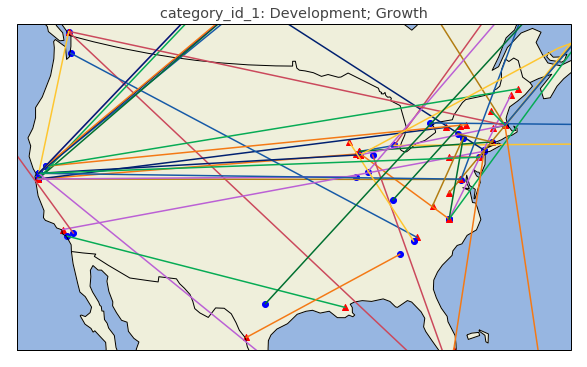

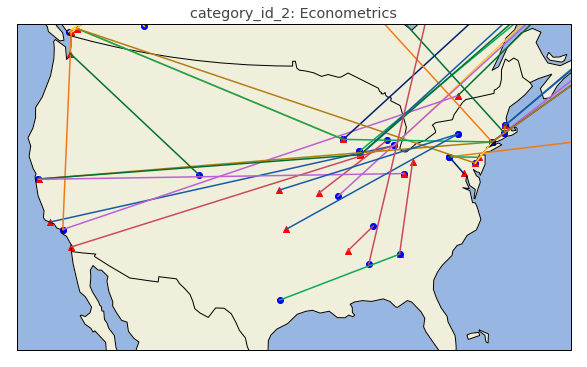

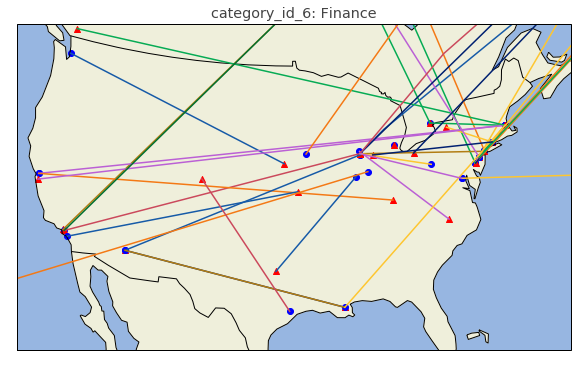

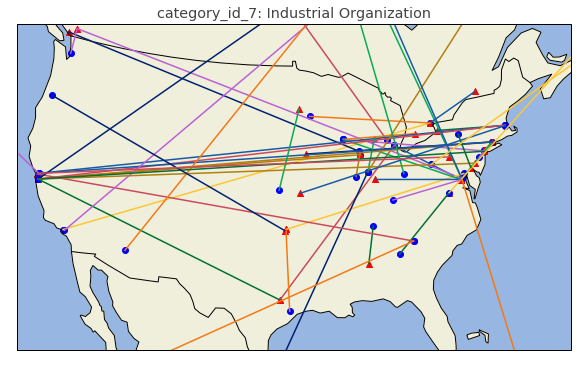

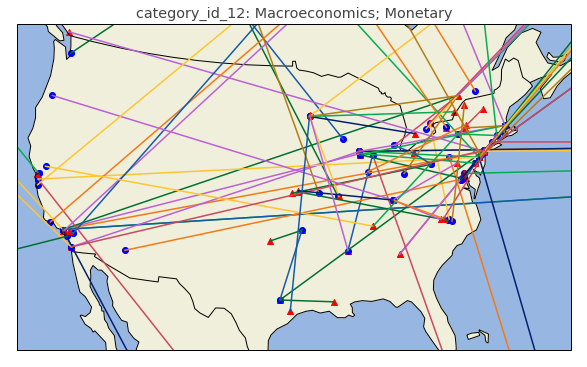

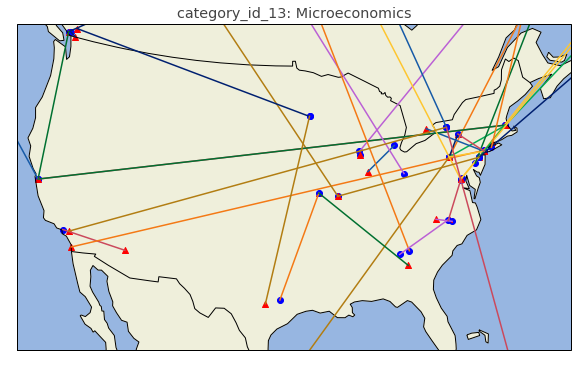

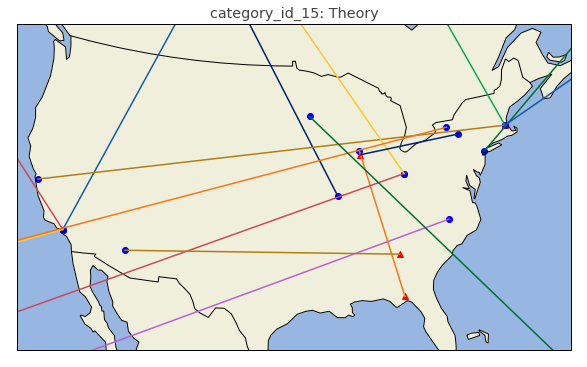

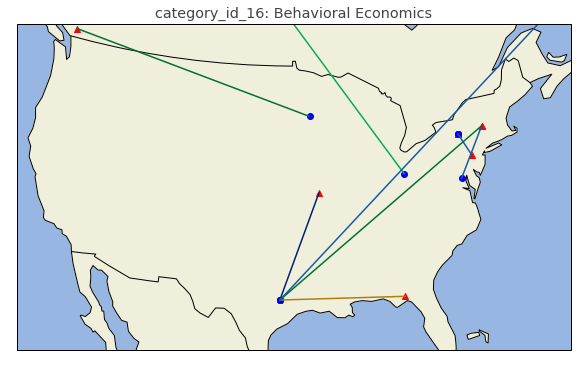

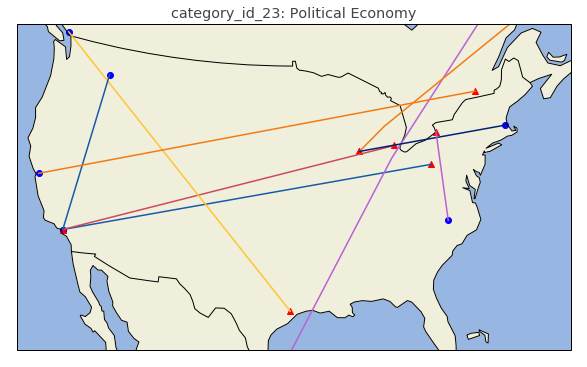

In [23]:
central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

#for j in inst_data.category_id.unique():
for j in {1,2,6,7,12,13,15,16,23}:
    fig = plt.figure(figsize=(12, 6))
    #ax = fig.add_subplot(projection = ccrs.PlateCarree()) #Projection list: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html
    ax = plt.axes(projection = ccrs.AlbersEqualArea(central_lon, central_lat)) #Projection list: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html
    ax.set_extent(extent)
    ax.coastlines()
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.LAND)
    ax.set_title("category_id_" + str(j) + ": " + data_subsets[j].name.unique()[0])
    
    for i in data_subsets[j].index:
        ax.scatter(inst_data.longitude[i], inst_data.latitude[i], transform = ccrs.Geodetic(), color = "blue", marker = "o") #use scatter point method from maps emailed
        ax.plot([inst_data.longitude[i], inst_data.to_longitude[i]], [inst_data.latitude[i], inst_data.to_latitude[i]], transform=ccrs.Geodetic())
        ax.scatter(inst_data.to_longitude[i], inst_data.to_latitude[i], transform = ccrs.Geodetic(), color = "red", marker = "^") #use scatter point method from maps emailed, ideally cartopy adaptation of basemap https://stackoverflow.com/questions/45512429/python-basemap-drawgreatcircle-with-arrow-end-cap?rq=1



## Maps by Applicant Primary Field (Names) - using annotation arrow proxy

In [22]:
#with arrows but not great circle plot

for j in inst_data.category_id.unique():
    fig = plt.figure(figsize=(25, 20))
    ax = fig.add_subplot(projection = ccrs.Mercator()) #Projection list: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html

    ax.coastlines()
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.LAND)
    ax.set_title("category_id_" + str(j) + ": " + data_subsets[j].name.unique()[0])
    transform = ccrs.PlateCarree()._as_mpl_transform(ax)
    for i in data_subsets[j].index:
        ax.annotate(" ", xy = (inst_data.to_longitude[i], inst_data.to_latitude[i]), xytext = (inst_data.longitude[i], inst_data.latitude[i]), arrowprops = dict(arrowstyle = "->", connectionstyle="arc3, rad = -0.8", color = "red"), xycoords = transform, ha = 'right', va = 'top', annotation_clip = False)



AttributeError: 'NoneType' object has no attribute 'coastlines'

<Figure size 1800x1440 with 0 Axes>

## Maps by Recruiter Type and Applicant Primary Field 

In [ ]:
data_subsets[1][data_subsets[1].recruiter_type == 1]

In [ ]:
for j in inst_data.category_id.unique():
    for k in data_subsets[j].recruiter_type.unique():
        fig = plt.figure(figsize=(25, 20))
        ax = fig.add_subplot(projection = ccrs.PlateCarree()) #Projection list: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html
    
        ax.coastlines()
        ax.add_feature(cfeature.OCEAN)
        ax.add_feature(cfeature.BORDERS)
        ax.add_feature(cfeature.LAND)
        ax.set_title("category_id_" + str(j) + ": " + data_subsets[j].name.unique()[0] + "; recruiter_type_" + str(k) + ": " + data_subsets[j][data_subsets[j].recruiter_type == k].description.unique()[0])
    
        for i in data_subsets[j][data_subsets[j].recruiter_type == k].index:
            ax.scatter(inst_data.longitude[i], inst_data.latitude[i], transform = ccrs.Geodetic(), color = "blue", marker = "o") #use scatter point method from maps emailed
            ax.plot([inst_data.longitude[i], inst_data.to_longitude[i]], [inst_data.latitude[i], inst_data.to_latitude[i]], transform=ccrs.Geodetic())
            ax.scatter(inst_data.to_longitude[i], inst_data.to_latitude[i], transform = ccrs.Geodetic(), color = "red", marker = "^") #use scatter point method from maps emailed, ideally cartopy adaptation of basemap https://stackoverflow.com/questions/45512429/python-basemap-drawgreatcircle-with-arrow-end-cap?rq=1
     

##  Interactive Map - no arrows

In [ ]:
import plotly.graph_objects as go

In [ ]:
from_location_data = pd.DataFrame(inst_data.loc[:, ["latitude", "longitude", "from_institution_name", "rank"]])
to_location_data = pd.DataFrame(inst_data.loc[:, ["to_latitude", "to_longitude", "to_name", "to_rank"]])
location_data_1 = from_location_data.rename(columns = {"from_institution_name": "institution_name"})
location_data_2 = to_location_data.rename(columns = {"to_latitude": "latitude", "to_longitude": "longitude", "to_name": "institution_name", "to_rank": "rank"})

location_data = pd.concat([location_data_1, location_data_2], ignore_index = True)
location_data = location_data.loc[:, ["latitude", "longitude", "institution_name", "rank"]]
location_data = location_data.drop_duplicates(ignore_index = True)

In [ ]:
location_data

In [ ]:
fig = go.Figure()

In [ ]:
fig.add_trace(go.Scattergeo(lon = location_data["longitude"], lat = location_data["latitude"], hoverinfo = "text", text = location_data.loc[:, ["institution_name", "rank"]], mode = "markers", marker = dict(size = 2, color = "rgb(255, 0, 0)", line = dict(width = 3, color = "rgba(68, 68, 68, 0)"))))

In [ ]:
for i in inst_data.index:
    fig.add_trace(go.Scattergeo(lon = [inst_data["longitude"][i], inst_data["to_longitude"][i]], lat = [inst_data["latitude"][i], inst_data["to_latitude"][i]], mode = "lines", line = dict(width = 1, color = "red")))
    
#opacity = float(df["count"][i]) / float(df["count"].max()) 

In [ ]:
fig.update_layout(
    title_text = "Interactive Map", showlegend = False, geo = dict(projection_type = "equirectangular", showland = True, landcolor = "rgb(243, 243, 243)", countrycolor = "rgb(204, 204, 204)",))

#to add markers https://plotly.com/python/marker-style/

#FIXME institution name and rank instead of lat, lon

## Ranking Scatterplot

In [ ]:
import seaborn as sns

In [ ]:
data_clean_rank = data.dropna(subset = ["rank", "to_rank"])

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
rank_scat = sns.regplot(x = "rank", y = "to_rank", data = data_clean_rank, ax = ax)
rank_scat.get_lines()[0].set_color("red")

## Maps by Applicant Primary Field (Names) - East to West: Red; West to East: Black - Great Circle Plots

In [ ]:
# note longitude 180 == -180 

In [ ]:
for j in inst_data.category_id.unique():
    fig = plt.figure(figsize=(25, 20))
    ax = fig.add_subplot(projection = ccrs.PlateCarree()) #Projection list: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html
    
    ax.set_global() #sets extent of map to be global, choose this to avoid indiscernible plot in terms of country, note lines close together now very small, comment for zoom default
    ax.coastlines()
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.LAND)
    ax.set_title("category_id_" + str(j) + ": " + data_subsets[j].name.unique()[0])
    
    for i in data_subsets[j].index:
        
        if inst_data.longitude[i] >= inst_data.to_longitude[i]:
            colors = "red"
        else: colors = "black"
        
        ax.plot([inst_data.longitude[i], inst_data.to_longitude[i]], [inst_data.latitude[i], inst_data.to_latitude[i]], transform=ccrs.Geodetic(), color = colors)
        

## B/W Maps by Applicant Primary Field (Names) - East to West: Red; West to East: Blue - Great Circle Plots

In [ ]:
for j in inst_data.category_id.unique():
    fig = plt.figure(figsize=(25, 20))
    ax = fig.add_subplot(projection = ccrs.PlateCarree()) #Projection list: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html
    
    ax.set_global() #sets extent of map to be global, choose this to avoid indiscernible plot in terms of country, note lines close together now very small, comment for zoom default
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.set_title("category_id_" + str(j) + ": " + data_subsets[j].name.unique()[0])
    
    for i in data_subsets[j].index:
        
        if inst_data.longitude[i] >= inst_data.to_longitude[i]:
            colors = "red"
        else: colors = "blue"
        
        ax.plot([inst_data.longitude[i], inst_data.to_longitude[i]], [inst_data.latitude[i], inst_data.to_latitude[i]], transform=ccrs.Geodetic(), color = colors)
        

## Maps by Applicant Primary Field (Names) - East to West: Red; West to East: Black - using annotation arrow proxy

In [ ]:
#with arrows but not great circle plot

for j in inst_data.category_id.unique():
    fig = plt.figure(figsize=(25, 20))
    ax = fig.add_subplot(projection = ccrs.Mercator()) #Projection list: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html

    ax.coastlines()
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.LAND)
    ax.set_title("category_id_" + str(j) + ": " + data_subsets[j].name.unique()[0])
    transform = ccrs.PlateCarree()._as_mpl_transform(ax)
    for i in data_subsets[j].index:
        
        if inst_data.longitude[i] >= inst_data.to_longitude[i]:
            colors = "red"
        else: colors = "black"
        
        ax.annotate(" ", xy = (inst_data.to_longitude[i], inst_data.to_latitude[i]), xytext = (inst_data.longitude[i], inst_data.latitude[i]), arrowprops = dict(arrowstyle = "->", connectionstyle="arc3, rad = -0.8", color = colors), xycoords = transform, ha = 'right', va = 'top', annotation_clip = False)



## B/W Maps by Applicant Primary Field (Names) - East to West: Red; West to East: Blue - using annotation arrow proxy

In [ ]:
#with arrows but not great circle plot

for j in inst_data.category_id.unique():
    fig = plt.figure(figsize=(25, 20))
    ax = fig.add_subplot(projection = ccrs.Mercator()) #Projection list: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html

    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.set_title("category_id_" + str(j) + ": " + data_subsets[j].name.unique()[0])
    transform = ccrs.PlateCarree()._as_mpl_transform(ax)
    for i in data_subsets[j].index:
        
        if inst_data.longitude[i] >= inst_data.to_longitude[i]:
            colors = "red"
        else: colors = "blue"
        
        ax.annotate(" ", xy = (inst_data.to_longitude[i], inst_data.to_latitude[i]), xytext = (inst_data.longitude[i], inst_data.latitude[i]), arrowprops = dict(arrowstyle = "->", connectionstyle="arc3, rad = -0.8", color = colors), xycoords = transform, ha = 'right', va = 'top', annotation_clip = False)


## Maps by Revised Recruiter Type and Applicant Primary Field

In [ ]:
for j in inst_data.category_id.unique():
    for k in data_subsets[j].revised_recruiter_hash.unique():
        fig = plt.figure(figsize=(25, 20))
        ax = fig.add_subplot(projection = ccrs.PlateCarree()) #Projection list: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html
        
        ax.set_global() #sets extent of map to be global, choose this to avoid indiscernible plot in terms of country, note lines close together now very small, comment for zoomed in default extent
        ax.coastlines()
        ax.add_feature(cfeature.OCEAN)
        ax.add_feature(cfeature.BORDERS)
        ax.add_feature(cfeature.LAND)
        ax.set_title("category_id_" + str(j) + ": " + data_subsets[j].name.unique()[0] + "; revised_recruiter_hash_" + str(k) + ": " + data_subsets[j][data_subsets[j].revised_recruiter_hash == k].description.unique()[0])
    
        for i in data_subsets[j][data_subsets[j].revised_recruiter_hash == k].index:
            ax.scatter(inst_data.longitude[i], inst_data.latitude[i], transform = ccrs.Geodetic(), color = "blue", marker = "o") #use scatter point method from maps emailed
            ax.plot([inst_data.longitude[i], inst_data.to_longitude[i]], [inst_data.latitude[i], inst_data.to_latitude[i]], transform=ccrs.Geodetic())
            ax.scatter(inst_data.to_longitude[i], inst_data.to_latitude[i], transform = ccrs.Geodetic(), color = "red", marker = "^") #use scatter point method from maps emailed, ideally cartopy adaptation of basemap https://stackoverflow.com/questions/45512429/python-basemap-drawgreatcircle-with-arrow-end-cap?rq=1
     

## Maps by Revised Recruiter Type and Applicant Primary Field - East to West: Red; West to East: Black

In [ ]:
for j in inst_data.category_id.unique():
    for k in data_subsets[j].revised_recruiter_hash.unique():
        fig = plt.figure(figsize=(25, 20))
        ax = fig.add_subplot(projection = ccrs.PlateCarree()) #Projection list: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html
        
        ax.set_global() #sets extent of map to be global, choose this to avoid indiscernible plot in terms of country, note lines close together now very small, comment for zoomed in default extent
        ax.coastlines()
        ax.add_feature(cfeature.OCEAN)
        ax.add_feature(cfeature.BORDERS)
        ax.add_feature(cfeature.LAND)
        ax.set_title("category_id_" + str(j) + ": " + data_subsets[j].name.unique()[0] + "; revised_recruiter_hash_" + str(k) + ": " + data_subsets[j][data_subsets[j].revised_recruiter_hash == k].description.unique()[0])
    
        for i in data_subsets[j][data_subsets[j].revised_recruiter_hash == k].index:
            
            if inst_data.longitude[i] >= inst_data.to_longitude[i]:
                colors = "red"
            else: colors = "black"
                
            ax.plot([inst_data.longitude[i], inst_data.to_longitude[i]], [inst_data.latitude[i], inst_data.to_latitude[i]], transform=ccrs.Geodetic(), color = colors)



## B/W Maps by Revised Recruiter Type and Applicant Primary Field - East to West: Red; West to East: Blue

In [ ]:
for j in inst_data.category_id.unique():
    for k in data_subsets[j].revised_recruiter_hash.unique():
        fig = plt.figure(figsize=(25, 20))
        ax = fig.add_subplot(projection = ccrs.PlateCarree()) #Projection list: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html
        
        ax.set_global() #sets extent of map to be global, choose this to avoid indiscernible plot in terms of country, note lines close together now very small, comment for zoomed in default extent
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS)
        ax.set_title("category_id_" + str(j) + ": " + data_subsets[j].name.unique()[0] + "; revised_recruiter_hash_" + str(k) + ": " + data_subsets[j][data_subsets[j].revised_recruiter_hash == k].description.unique()[0])
    
        for i in data_subsets[j][data_subsets[j].revised_recruiter_hash == k].index:
            
            if inst_data.longitude[i] >= inst_data.to_longitude[i]:
                colors = "red"
            else: colors = "blue"
                
            ax.plot([inst_data.longitude[i], inst_data.to_longitude[i]], [inst_data.latitude[i], inst_data.to_latitude[i]], transform=ccrs.Geodetic(), color = colors)

